In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

%matplotlib inline

# data 경로 설정
DATA_DIR = ''

In [3]:
train = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
test = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))

데이터 개요 확인

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [9]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [10]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [11]:
# datatime 컬럼 변환
train['datetime']=pd.to_datetime(train['datetime'])

In [12]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['dayofweek'] = train['datetime'].dt.dayofweek
train['quarter'] = train['datetime'].dt.quarter
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [15]:
# datatime 컬럼 변환
test['datetime']=pd.to_datetime(test['datetime'])

In [16]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['dayofweek'] = test['datetime'].dt.dayofweek
test['quarter'] = test['datetime'].dt.quarter
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second

In [17]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,quarter,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,1,4,0,0


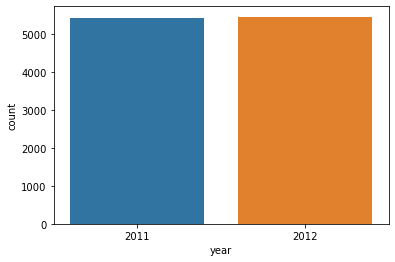

In [18]:
sns.countplot(x='year',data=train)
plt.show()

In [21]:
pd.DataFrame(train.groupby('month')['temp'].mean())

,temp
month,
1,9.840000
2,11.798535
3,15.902175
4,18.718372
5,22.674079
6,27.064496
7,30.841711
8,29.736689
9,25.779032


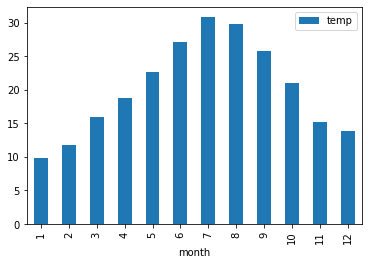

In [24]:
pd.DataFrame(train.groupby('month')['temp'].mean()).plot(kind='bar')
plt.show()

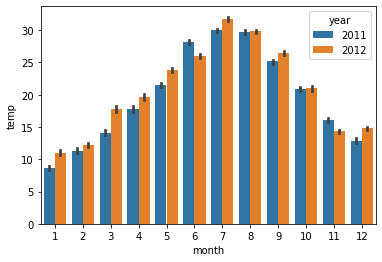

In [25]:
sns.barplot(x='month',y='temp',hue='year',data=train)
plt.show()

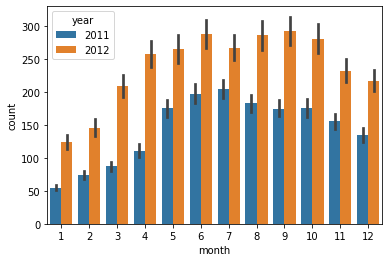

In [26]:
sns.barplot(x='month',y='count',hue='year',data=train)
plt.show()

In [28]:
train['minute'].value_counts()

0    10886
Name: minute, dtype: int64

minute와 second는 단일 값으로 분포하고 있음을 확인
단일 값으로 구성되어 있는 경우, 머신러닝 예측에 도움이 되지 않으므로 (모든 값이 동일)제거한다.

In [29]:
train= train.drop(['minute','second'],axis=1)
test= test.drop(['minute','second'],axis=1)

In [30]:
# weekend 컬럼을 생성(주말)
# 주말인 경우 1, 주말인 경우 0
train['weekend'] = train['dayofweek'].apply(lambda x: int(x in [5,6]))
test['weekend'] = test['dayofweek'].apply(lambda x: int(x in [5,6]))

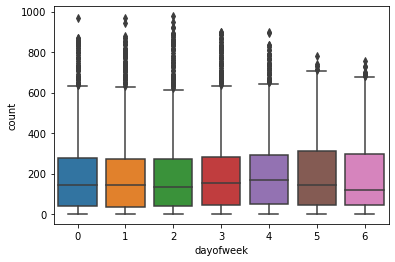

In [31]:
sns.boxplot(x='dayofweek',y='count',data=train)
plt.show()

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

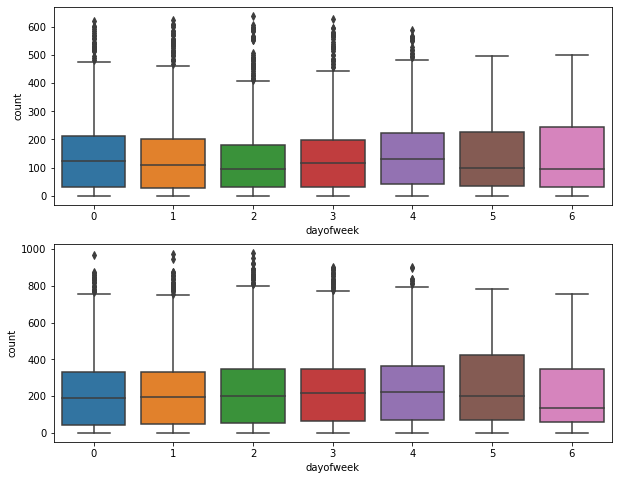

In [33]:
#2011년과 2012년 데이터 비교
fig, ax = plt.subplots(2,1)
fig.set_size_inches(10,8)
sns.boxplot(x='dayofweek',y='count',data=train.loc[train['year']==2011],ax=ax[0])
sns.boxplot(x='dayofweek',y='count',data=train.loc[train['year']==2012],ax=ax[1])

<AxesSubplot:xlabel='hour', ylabel='registered'>

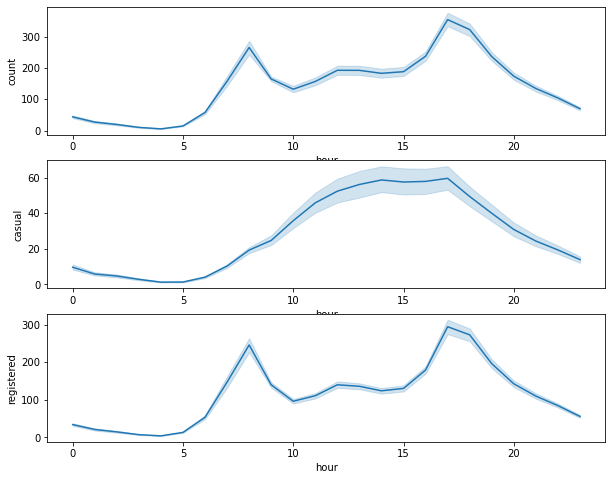

In [35]:
#2011년과 2012년 데이터 비교
fig, ax = plt.subplots(3,1)
fig.set_size_inches(10,8)
sns.lineplot(x='hour',y='count',data=train.loc[train['year']==2011],ax=ax[0])
sns.lineplot(x='hour',y='casual',data=train.loc[train['year']==2011],ax=ax[1])
sns.lineplot(x='hour',y='registered',data=train.loc[train['year']==2011],ax=ax[2])

<AxesSubplot:xlabel='hour', ylabel='count'>

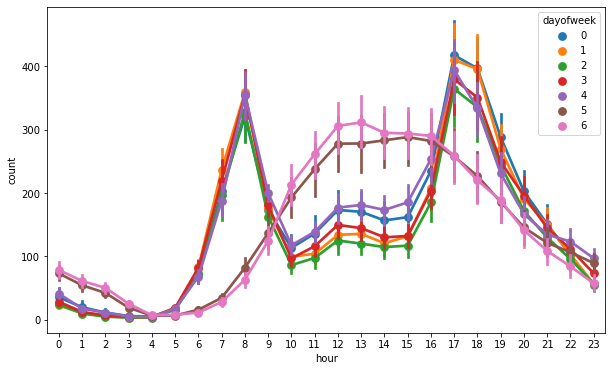

In [36]:
plt.figure(figsize=(10,6))
sns.pointplot(x='hour',y='count',hue='dayofweek',data=train.loc[train['year']==2011])

<AxesSubplot:xlabel='hour', ylabel='count'>

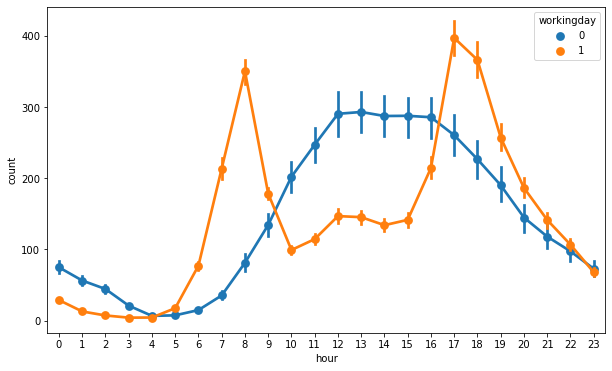

In [37]:
plt.figure(figsize=(10,6))
sns.pointplot(x='hour',y='count',hue='workingday',data=train.loc[train['year']==2011])

<AxesSubplot:xlabel='hour', ylabel='count'>

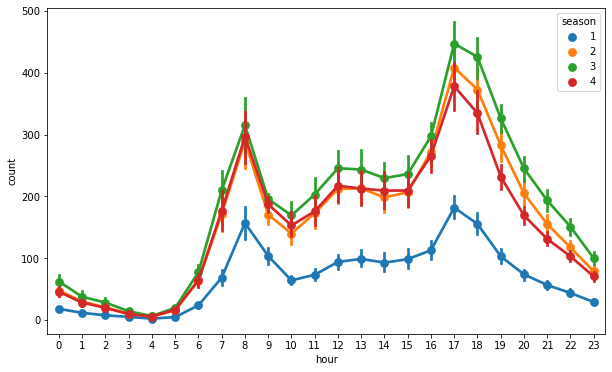

In [38]:
plt.figure(figsize=(10,6))
sns.pointplot(x='hour',y='count',hue='season',data=train.loc[train['year']==2011])

In [40]:
train[['temp','atemp','weather','count','casual','registered']].corr()

,temp,atemp,weather,count,casual,registered
temp,1.000000,0.984948,0.055035,0.394454,0.467097,0.318571
atemp,0.984948,1.000000,0.055376,0.389784,0.462067,0.314635
weather,0.055035,0.055376,1.000000,0.128655,0.135918,0.109340
count,0.394454,0.389784,0.128655,1.000000,0.690414,0.970948
casual,0.467097,0.462067,0.135918,0.690414,1.000000,0.497250
registered,0.318571,0.314635,0.109340,0.970948,0.497250,1.000000


<AxesSubplot:>

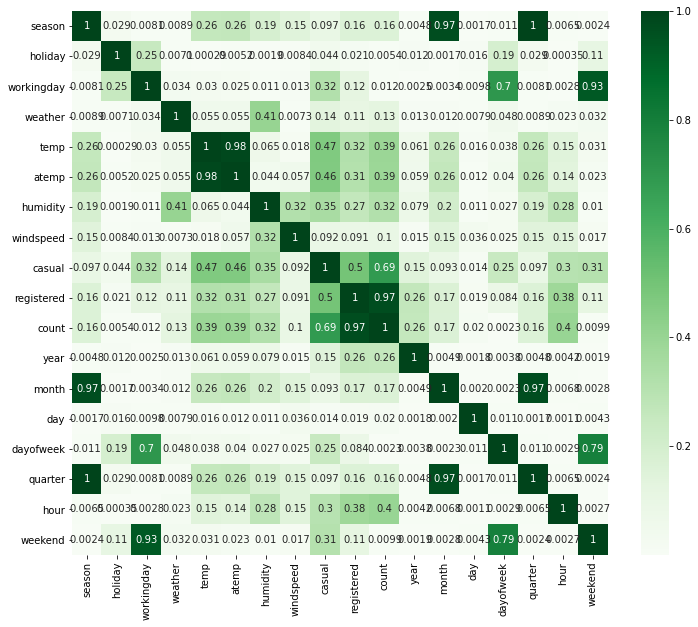

In [41]:
# 먼저 크기를 보고싶을 때
plt.figure(figsize=(12,10))
sns.heatmap(abs(train.corr()),annot=True,cmap='Greens')

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=123)
train_temp = pca.fit_transform(train[['temp','atemp']])
test_temp = pca.transform(test[['temp','atemp']])

In [45]:
train = train.drop(['temp','atemp'],axis=1)
test = test.drop(['temp','atemp'],axis=1)

train['temp_pca'] = train_temp
test['temp_pca'] = test_temp

In [46]:
train.head()

,datetime,season,holiday,workingday,weather,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,quarter,hour,weekend,temp_pca
0,2011-01-01 00:00:00,1,0,0,1,81,0.0,3,13,16,2011,1,1,5,1,0,1,13.848653
1,2011-01-01 01:00:00,1,0,0,1,80,0.0,8,32,40,2011,1,1,5,1,1,1,14.963061
2,2011-01-01 02:00:00,1,0,0,1,80,0.0,5,27,32,2011,1,1,5,1,2,1,14.963061
3,2011-01-01 03:00:00,1,0,0,1,75,0.0,3,10,13,2011,1,1,5,1,3,1,13.848653
4,2011-01-01 04:00:00,1,0,0,1,75,0.0,0,1,1,2011,1,1,5,1,4,1,13.848653


In [47]:
pd.DataFrame(abs(train.corr())['count'].sort_values(ascending=False))

,count
count,1.000000
registered,0.970948
casual,0.690414
hour,0.400601
temp_pca,0.393394
humidity,0.317371
year,0.260403
month,0.166862
quarter,0.163439
season,0.163439


<AxesSubplot:>

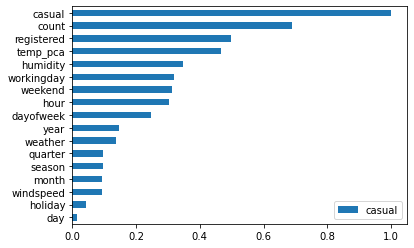

In [49]:
pd.DataFrame(abs(train.corr())['casual'].sort_values(ascending=True)).plot(kind='barh')